# **Introducción**

Se cuenta con una información de créditos otorgados a pequeñas empresas en los Estados Unidos. Los datos se obtuvieron de la página https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied se cuenta con 899,164 filas y 27 columnas. Los datos se presentan en formato tabular, las columnas representan caracteristicas de cada préstamos y cada fila representan un préstamo realizado a una pequeña empresa.




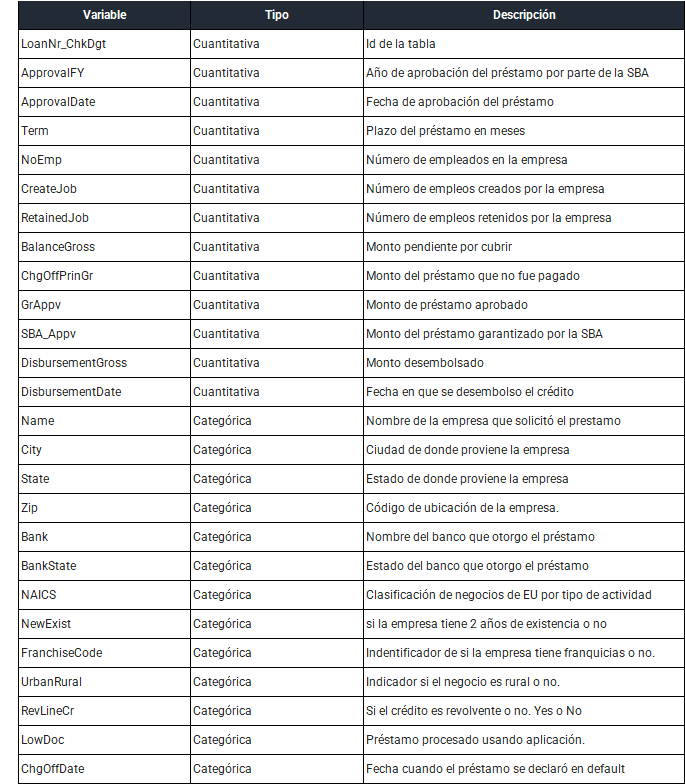

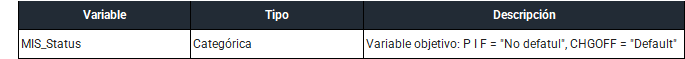

# **Preparación de datos**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# Lectura de los datos
data = pd.read_csv("/content/SBAnational.csv")
# Dimension de los datos
print("\n Dimension de los datos: ",data.shape,"\n")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



 Dimension de los datos:  (899164, 27) 



In [7]:
# Columnas del dataset
np.array(data.columns).reshape(-1,1)

array([['LoanNr_ChkDgt'],
       ['Name'],
       ['City'],
       ['State'],
       ['Zip'],
       ['Bank'],
       ['BankState'],
       ['NAICS'],
       ['ApprovalDate'],
       ['ApprovalFY'],
       ['Term'],
       ['NoEmp'],
       ['NewExist'],
       ['CreateJob'],
       ['RetainedJob'],
       ['FranchiseCode'],
       ['UrbanRural'],
       ['RevLineCr'],
       ['LowDoc'],
       ['ChgOffDate'],
       ['DisbursementDate'],
       ['DisbursementGross'],
       ['BalanceGross'],
       ['MIS_Status'],
       ['ChgOffPrinGr'],
       ['GrAppv'],
       ['SBA_Appv']], dtype=object)

**En este primera etapa eliminaremos algunas variables que no son útiles para ajustar el modelo.**

## **Variables Cuantitativas**

In [8]:
# Descripción:  Id de la tabla
# Acciones:     Eliminar variable
data["LoanNr_ChkDgt"]
data.drop(columns=["LoanNr_ChkDgt"],inplace=True)

In [9]:
# Descripción:  Anio de aprobación del prestamo por parte de la SBA
# Acción:       Remover caracteres y convertir a entero
data["ApprovalFY"] = data["ApprovalFY"].replace(regex=[r'\D+'], value="").astype(int)

In [10]:
# Descripción:  Fecha de aprobación del préstamo por parte de la SBA
# Acción:       Eliminar esta variable, ya que se considerará sólo el año, el cual está en ApprovalFY
data["ApprovalDate"]
data.drop(columns=["ApprovalDate"],inplace=True)

In [11]:
# Descripción:  Plazo del prestamo en meses
# Acción:       Ninguna, la usaremos para el modelo
data["Term"] = data["Term"].replace(regex=[r'\D+'], value="").astype(int)

In [12]:
# Descripción:  Numero de empleados en la empresa
# Acciones:     Ninguna, la usaremos para el modelo
data["NoEmp"] = data["NoEmp"].replace(regex=[r'\D+'], value="").astype(int)

In [13]:
# Descripción:  Número de empleos creados por la empresa
# Acciones:     Ninguna. No tiene NA
data["CreateJob"] = data["CreateJob"].replace(regex=[r'\D+'], value="").astype(int)

In [14]:
# Descripcion:  Número de empleos retenidos por la empresa
# Acciones:     Ninguna, no tiene valores NA
data["RetainedJob"] = data["RetainedJob"].replace(regex=[r'\D+'], value="").astype(int)

In [15]:
# Descripcion:  Monto pendiente  en la cuenta
# Acciones:     Conservar la variable para el modelo
# print(data["BalanceGross"].value_counts())
# data.drop(columns=["BalanceGross"],inplace=True)
data["BalanceGross"] = data["BalanceGross"].replace(regex=[r'\D+'], value="").astype(int)

In [16]:
# Descripción:  Monto castigado
# Acciones:     Eliminar ya que tiene la misma información que la variable a objetivo
data.drop(columns=["ChgOffPrinGr"],inplace=True)

In [17]:
# Descripción:  Monto de préstamo aprobado por el banco
# Acciones:     No tiene NA, no realizamos ninguna acción.
data["GrAppv"] = data["GrAppv"].replace(regex=[r'\D+'], value="").astype(int)

In [18]:
# Descripción:  Monto de préstamo garantizado por la SBA
# Acciones:     No tiene NAN. No realizamos ningún ajuste
data["SBA_Appv"] = data["SBA_Appv"].replace(regex=[r'\D+'], value="").astype(int)

In [19]:
# Descripción:  Monto desembolsado
# Acciones:     Ninguna, esta variable no tiene NA
data["DisbursementGross"] = data["DisbursementGross"].replace(regex=[r'\D+'], value="").astype(int)

In [20]:
# Descripcion: Fecha Fecha de desembolso
# Accion: Extraer solo el año. Imputar los 2368 NA con "ApprovalFY" (Año de aprobación de credito}
data["DisbursementDate"] = data["DisbursementDate"].str.split('-', expand=True).iloc[::,2].copy()
data.loc[(data["DisbursementDate"].isna()) ,"DisbursementDate"] = data.loc[(data["DisbursementDate"].isna()),"ApprovalFY"].apply(str).str[:2]
data["DisbursementDate"] = data["DisbursementDate"].replace(regex=[r'\D+'], value="").astype(int)
# Corregir fechas
data.loc[data["DisbursementDate"]>28,["DisbursementDate"]] = data.loc[data["DisbursementDate"]>28,["DisbursementDate"]] + 1900
data.loc[data["DisbursementDate"]<=28,["DisbursementDate"]] = data.loc[data["DisbursementDate"]<=28,["DisbursementDate"]] + 2000

## **Variables Cualitativas**

In [21]:
# Descripción:  Variable Name representa el nombre de la empresa que solicitó el prestamo
# Acciones:     Eliminar variable ya que resulta irrelevante el nombre
data.drop(columns=["Name"],inplace=True)

In [22]:
# Descripción: Variable City representa la ciudad de donde proviene la empresa que solicitó el prestamo
# Acciones: Tenemos en total 32,582 categorías en esta variable, tiene demasiadas categorías y al implementar un modelo meterle ruido.
# De acuerdo con Mineria de Datos con R, de Amparo Gaona, podemos agruparla en categorías más generales, por ejemplo, Estado.
data.drop(columns=["City"],inplace=True)

In [23]:
# Descripción:  Estado de donde proviene la empresa
# Acciones:     Eliminar los valores NA
data["State"].isna().sum()
data.dropna(subset=["State"],inplace=True)   

In [24]:
# Descripción: Código de ubicación de la empresa.
# Acciones: Se cueenta con 33,611 categorias diferentes. PRocederemos a agrupar en clases mas generales, en este caso usaremos el State.
# Por lo cual se eliminará la variable Zip
print(len(data["Zip"].unique()))
data.drop(columns=["Zip"],inplace=True)

33610


In [25]:
#Decripción:  Nombre del banco que otorgo el préstamo
#Acciones:    Existen 5,801 categorías en esta columna. Podriamos conservar solo las 10 categorias mas repetidas. 
x = 100*data["Bank"].value_counts(1).head(10)
data.loc[~data["Bank"].isin(x.index),["Bank"]]="OTHER"
data["Bank"].value_counts(1)

OTHER                             0.596035
BANK OF AMERICA NATL ASSOC        0.096595
WELLS FARGO BANK NATL ASSOC       0.070624
JPMORGAN CHASE BANK NATL ASSOC    0.053569
U.S. BANK NATIONAL ASSOCIATION    0.039085
CITIZENS BANK NATL ASSOC          0.038986
PNC BANK, NATIONAL ASSOCIATION    0.030419
BBCN BANK                         0.025555
CAPITAL ONE NATL ASSOC            0.024743
MANUFACTURERS & TRADERS TR CO     0.012528
READYCAP LENDING, LLC             0.011860
Name: Bank, dtype: float64

In [26]:
# Descripción:  Estado del banco que otorgo el préstamo
# Acciones:     Eliminar filas con  NA
data["BankState"].isna().sum()
data.dropna(subset=["BankState"],inplace=True)

In [27]:
# Descripcion:  Código de clasificación de negocios de EU por tipo de actividad
# Acciones:     Esta variable tiene 22% de valores sin código válido de actividad, es decir, son valores NA.
#               Al ser un valor tan alto puede ser malo para el modelo de predicción, por lo cual se eliminará esta variable.
data.drop(columns=["NAICS"],inplace=True)

In [28]:
# Descripción:  Indicador si la empresa tiene 2 años de existencia o no. 1: Negocio Existente. 2: Negocio nuevo.
# Acciones:     Se tenian 136 valores con NA. Los elimninaremos al ser una porción muy pequeña
data.loc[data["NewExist"]==0,["NewExist"]] = np.nan
data.dropna(subset=["NewExist"],inplace=True)
data["NewExist"] = data["NewExist"].apply(int).apply(str)
data["NewExist"].value_counts(1)

1    0.718062
2    0.281938
Name: NewExist, dtype: float64

In [29]:
# Descripcion: Indentificador de si la empresa tiene franquicias o no. 00000 ó 00001 significa no franquicia.
# Acciones: Agregar las categorias en Franquicia / No Franquicia
filas = (data["FranchiseCode"]==0) | (data["FranchiseCode"]==1)
data.loc[filas,"FranchiseCode"] = "No_Franquicia"
data.loc[~filas,"FranchiseCode"] = "Si_Franquicia"
data["FranchiseCode"].value_counts(1)  

No_Franquicia    0.942417
Si_Franquicia    0.057583
Name: FranchiseCode, dtype: float64

In [30]:
# Descripción:  Indicador si el negocio es rural o no. 0=Indefinido, 1=Urbano, 2=Rural. 
# Acciones:     No tiene NA. Categorizar en Urbano/Rural/Indefinido
data.loc[data["UrbanRural"]==1,"UrbanRural"] = "Urbano"
data.loc[data["UrbanRural"]==2,"UrbanRural"] = "Rural"
data.loc[data["UrbanRural"]==0,"UrbanRural"] = "Indefinido"
data["UrbanRural"].value_counts()

Urbano        470177
Indefinido    321089
Rural         105152
Name: UrbanRural, dtype: int64

In [31]:
# Descripcion:  Si el crédito es revolvente o no. Yes o No.
# Acciones:     Tiene un 28% de valores que no caen en las 2 categorias. Eliminar columna
data["RevLineCr"].value_counts()
data.drop(columns=["RevLineCr"],inplace=True)

In [32]:
# Descripción:  Préstamo procesado usando la aplicación one-page (Más rápido que el papeleo estándar). Yes o No.
# Acciones:     Asignar las categorias en Y o N, los NA mandarlos a la moda
data["LowDoc"].value_counts(1)
moda = data["LowDoc"].mode()
data.loc[(data["LowDoc"]!="N") & (data["LowDoc"]!="Y"),"LowDoc"] = moda
data["LowDoc"].value_counts()

N    780323
Y    110099
Name: LowDoc, dtype: int64

In [33]:
# Descripción:  Fecha cuando el préstamo se declaró en default
# Acciones:     Esta variable tiene la misma información que la variable objetivo "MIS_Status"
data.drop(columns=["ChgOffDate"],inplace=True)

In [34]:
# Descripción:  Variable objetivo que indica si el prestamo fue pagado o cayo en default
# Acciones:     Eliminar valores NA.
data.dropna(subset=["MIS_Status"],inplace=True)

**A continación se muestra un resumen de las razones para eliminar variables que no serán usadas en el modelo.**

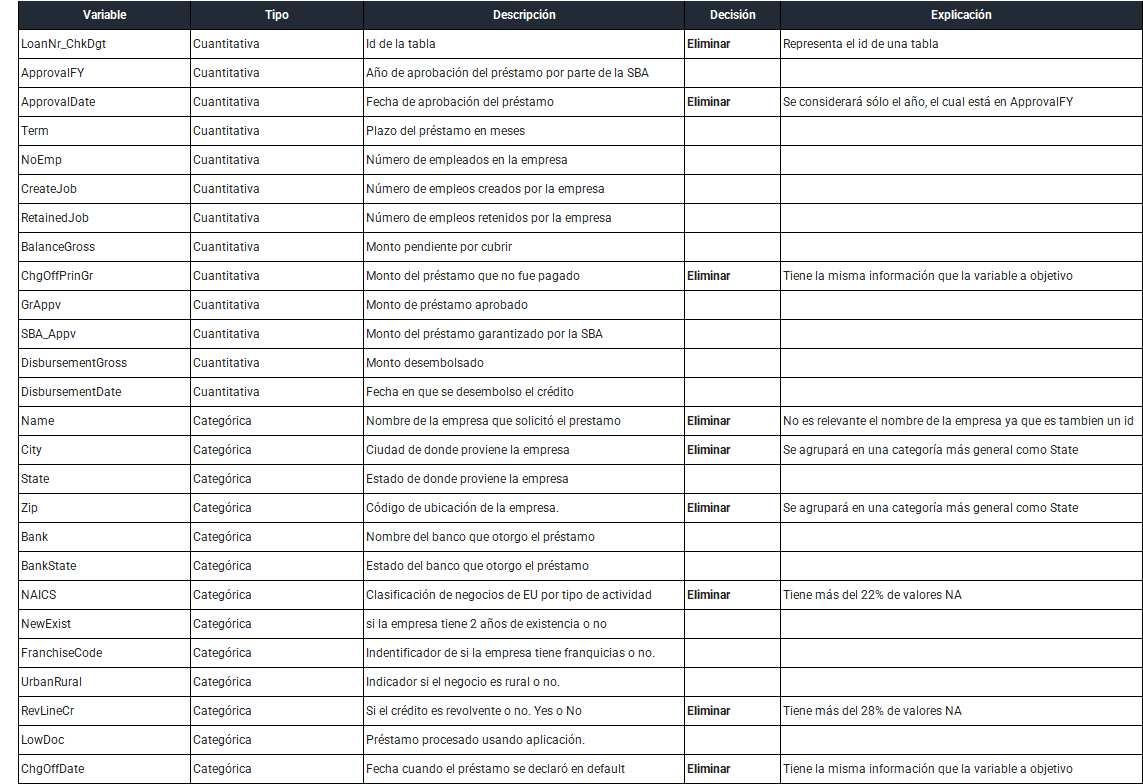

**Se conservan 17 variables en total: 
10 variables cuantitativas y 7 variables categóricas.**

In [35]:
cuantitativas = ["ApprovalFY","Term","NoEmp","CreateJob","RetainedJob","BalanceGross","GrAppv","SBA_Appv","DisbursementGross","DisbursementDate"]
categoricas   = ["State","Bank","BankState","NewExist","FranchiseCode","UrbanRural","LowDoc"]

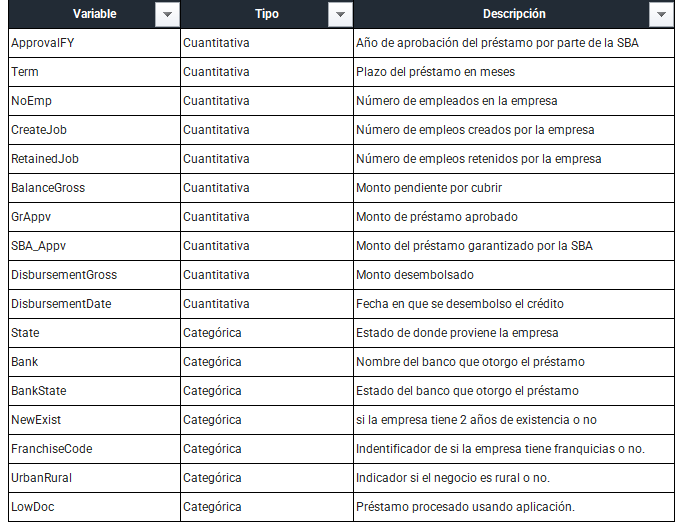

# **Reducción de dimensión**

Uno de los métodos para realizar la reducción de variables es através del PCA el cual consiste en obtener un nuevo conjunto de variables que son combinación lineal de las variables originales, con la caracteristica de que cada una de las nuevas componentes es ortogonal a las otras, y además están construidas de manera que con unas pocas componentes se pueda conservar el máximo de varianza original en el conjunto de datos. Para este análisis únicamente se considerarán las variables cuantitativas.

El análisis de componenetes principales se puede realizar únicamente cuando existe alta correlación entre las variables. A continuación veamos la matriz de correlaciones, donde podemos notar que algunas variables tienen correlaciones casi 1. Por lo cual podemos realizar el PCA.

In [36]:
X = data[cuantitativas].copy()

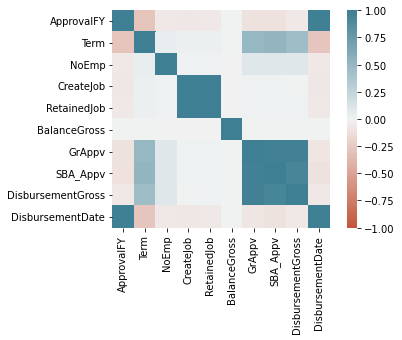

In [37]:
#Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(X.corr(),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

Antes de realizar la redución de dimensión con PCA se optó por escalar las variables para reducir el efecto de la diferencia de escalas.

In [38]:
# Escalamiento de variables numericas   
from sklearn.preprocessing import MinMaxScaler                                  
scaler = MinMaxScaler()                                                         
scaler.fit(X)                                                  
X = pd.DataFrame(scaler.transform(X),columns=X.columns,index=X.index.values)
X.describe()  

,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,BalanceGross,GrAppv,SBA_Appv,DisbursementGross,DisbursementDate
count,894482.000000,894482.000000,894482.00000,894482.000000,894482.000000,894482.000000,894482.000000,894482.000000,894482.000000,894482.000000
mean,0.714645,0.194764,0.00114,0.000954,0.001133,0.000003,0.035079,0.027256,0.017259,0.665704
std,0.131086,0.138640,0.00737,0.026819,0.024891,0.001451,0.051799,0.041762,0.025150,0.073541
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.622222,0.105448,0.00020,0.000000,0.000000,0.000000,0.006215,0.003792,0.003346,0.612500
50%,0.733333,0.147627,0.00040,0.000000,0.000105,0.000000,0.016268,0.011167,0.008390,0.687500
75%,0.822222,0.210896,0.00100,0.000114,0.000421,0.000000,0.040943,0.031893,0.020481,0.725000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Posterirmente se realiza la reducción de variables con PCA. Con 4 componentes se explica el 99% de la varianza del dataset original. Por lo cual consideramos solo estas 4 componentes.

In [39]:
#Obtener las componentes principales
# Definir el numero de componentes
k=3
# Realizar el escalamiento las variables del dataset. Para nuestro caso ya lo realizamos.
X
# Obtener las componentes principales usando las funciones definidas en sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=k)
pca.fit(X)
#Suma de varianza explicada
print("Porcentaje de varianza explicada con",k,"componentes:",sum(pca.explained_variance_ratio_))                                              
X = pd.DataFrame(pca.transform(X), columns = [f'Componente_{i}' for i in range(1,k+1)] )
X

Porcentaje de varianza explicada con 3 componentes: 0.9665633134360315


,Componente_1,Componente_2,Componente_3
0,0.035783,-0.103996,-0.010990
1,0.017309,-0.143112,-0.001681
2,0.161263,0.022007,-0.011832
3,0.017097,-0.143455,-0.002863
4,0.226851,0.094086,-0.053116
...,...,...,...
894477,0.018582,-0.141051,0.005416
894478,0.018730,-0.140776,0.006426
894479,0.081554,-0.066266,0.031472
894480,0.018794,-0.140708,0.006598


# **Implementación del modelo**

Realizamos la separación del dataset en entrenamiento y prueba. En este caso se usará el método Hold Out, aunque una opción para mejorar el desempeño del modelo es usar un balanceo de clases, ya que tenemos actualmente tenemos 80% de tuplas de clase 0 y 20% de tuplas de clase 1.

In [40]:
# Poner la etiqueta a la variable objetivo
from sklearn.preprocessing import LabelEncoder
y = data[["MIS_Status"]].copy()
filas = (y["MIS_Status"]=="P I F")
y.loc[filas,"MIS_Status"]=0
y.loc[~filas,"MIS_Status"]=1
y = y["MIS_Status"].values
y = LabelEncoder().fit_transform(y)

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1,stratify=y)
print("Tamaño del conjunto de entrenamiento:",X_train.shape[0])
print("Tamaño del conjunto de entrenamiento:",X_test.shape[0])
print("Porcentaje de clases en el conjunto de entrenamiento")
print(100*pd.DataFrame(y_train).value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: 536689
Tamaño del conjunto de entrenamiento: 357793
Porcentaje de clases en el conjunto de entrenamiento
0    82.402285
1    17.597715
dtype: float64


## **Perceptrón Multicapa**


A continuación se probarán diversas configuraciones de MLP variando el número de capas, nodos en cada capa, y funciones de activación.

In [282]:
from tensorflow.keras import activations
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# Definir el tamanio de la capa de entrada
n_features = X_train.values.shape[1]
# Definir el modelo a utilizar
model = Sequential()
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation=activations.tanh))  
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
# Ajuste del modelo. Tambien se calcula el error en entrenamiento y prueba.
history = model.fit(X_train.values, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/100
5367/5367 [==============================] - 23s 4ms/step - loss: 0.5983 - accuracy: 0.8220 - val_loss: 0.4722 - val_accuracy: 0.8610
Epoch 2/100
5367/5367 [==============================] - 21s 4ms/step - loss: 0.4846 - accuracy: 0.8288 - val_loss: 0.4584 - val_accuracy: 0.8491
Epoch 3/100
5367/5367 [==============================] - 21s 4ms/step - loss: 0.4675 - accuracy: 0.8290 - val_loss: 0.4067 - val_accuracy: 0.8257
Epoch 4/100
5367/5367 [==============================] - 21s 4ms/step - loss: 0.3985 - accuracy: 0.8534 - val_loss: 0.3513 - val_accuracy: 0.8687
Epoch 5/100
5367/5367 [==============================] - 22s 4ms/step - loss: 0.3800 - accuracy: 0.8624 - val_loss: 0.3390 - val_accuracy: 0.8772
Epoch 6/100
5367/5367 [==============================] - 21s 4ms/step - loss: 0.3494 - accuracy: 0.8681 - val_loss: 0.3150 - val_accuracy: 0.8726
Epoch 7/100
5367/5367 [==============================] - 21s 4ms/step - loss: 0.3312 - accuracy: 0.8759 - val_loss: 0.2991 -

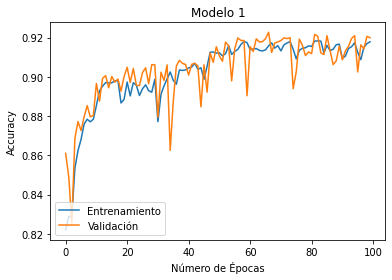

In [288]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo 1')
plt.ylabel('Accuracy')
plt.xlabel('Número de Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower left')
plt.show()

In [362]:
#Obtener la matriz de confusión
y_prediccion = (model.predict(X_test) > 0.5).astype("int32")
y_pred = []
for k in range(0,len(y_prediccion)):
  y_pred.append(y_prediccion[k][0])
y_pred = np.array(y_pred)
y_pred = pd.DataFrame(y_pred,columns=["Prediccion"])
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred["Prediccion"].values)
print(cf_matrix)

Exactitud =              (cf_matrix[0,0]+cf_matrix[1,1]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Error_de_clasificacion = (cf_matrix[0,1]+cf_matrix[1,0]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Sensibilidad =           (cf_matrix[0,0]               ) / (cf_matrix[0,0]+cf_matrix[0,1]                              )
Especificidad=           (cf_matrix[1,1]               ) / (cf_matrix[1,1]+cf_matrix[0,1]                              )
print("Exactitud:", 100*Exactitud)
print("Error de clasificación:", 100*Error_de_clasificacion)
print("Sensibilidad:", 100*Sensibilidad)
print("Especificidad:", 100*Especificidad)

[[284005  10825]
 [ 17826  45137]]
Exactitud: 91.99229722213683
Error de clasificación: 8.007702777863178
Sensibilidad: 96.32839263304277
Especificidad: 80.65651692219721


In [290]:
from tensorflow.keras import activations
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# Definir el tamanio de la capa de entrada
n_features = X_train.values.shape[1]
# Definir el modelo a utilizar
model2 = Sequential()
model2.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model2.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(1, activation=activations.tanh))  
# Compilar el modelo
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
# Ajuste del modelo. Tambien se calcula el error en entrenamiento y prueba.
history = model2.fit(X_train.values, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.3137 - accuracy: 0.8678 - val_loss: 0.2970 - val_accuracy: 0.8755
Epoch 2/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2868 - accuracy: 0.8778 - val_loss: 0.2799 - val_accuracy: 0.8801
Epoch 3/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.2747 - accuracy: 0.8832 - val_loss: 0.2693 - val_accuracy: 0.8818
Epoch 4/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2787 - accuracy: 0.8825 - val_loss: 0.2839 - val_accuracy: 0.8816
Epoch 5/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2789 - accuracy: 0.8809 - val_loss: 0.2663 - val_accuracy: 0.8860
Epoch 6/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2790 - accuracy: 0.8859 - val_loss: 0.2747 - val_accuracy: 0.8891
Epoch 7/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2787 - accuracy: 0.8898 - val_loss: 0.2696 -

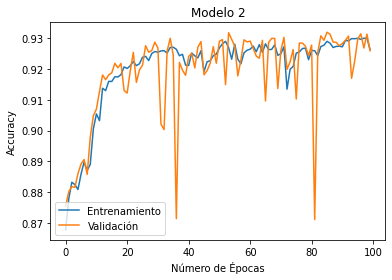

In [291]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo 2')
plt.ylabel('Accuracy')
plt.xlabel('Número de Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower left')
plt.show()

In [359]:
#Obtener la matriz de confusión
y_prediccion = (model2.predict(X_test) > 0.5).astype("int32")
y_pred = []
for k in range(0,len(y_prediccion)):
  y_pred.append(y_prediccion[k][0])
y_pred = np.array(y_pred)
y_pred = pd.DataFrame(y_pred,columns=["Prediccion"])
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred["Prediccion"].values)
print(cf_matrix)

Exactitud =              (cf_matrix[0,0]+cf_matrix[1,1]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Error_de_clasificacion = (cf_matrix[0,1]+cf_matrix[1,0]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Sensibilidad =           (cf_matrix[0,0]               ) / (cf_matrix[0,0]+cf_matrix[0,1]                              )
Especificidad=           (cf_matrix[1,1]               ) / (cf_matrix[1,1]+cf_matrix[0,1]                              )
print("Exactitud:", 100*Exactitud)
print("Error de clasificación:", 100*Error_de_clasificacion)
print("Sensibilidad:", 100*Sensibilidad)
print("Especificidad:", 100*Especificidad)

[[282947  11883]
 [ 14645  48318]]
Exactitud: 92.58565706987001
Error de clasificación: 7.414342930129991
Sensibilidad: 95.96954176983347
Especificidad: 80.2611252304779


In [365]:
from tensorflow.keras import activations
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# Definir el tamanio de la capa de entrada
n_features = X_train.values.shape[1]
# Definir el modelo a utilizar
model3 = Sequential()
model3.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model3.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(1, activation=activations.sigmoid))  
# Compilar el modelo
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
# Ajuste del modelo. Tambien se calcula el error en entrenamiento y prueba.
history = model3.fit(X_train.values, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.2862 - accuracy: 0.8786 - val_loss: 0.2628 - val_accuracy: 0.8853
Epoch 2/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.2546 - accuracy: 0.8926 - val_loss: 0.2503 - val_accuracy: 0.8947
Epoch 3/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.2397 - accuracy: 0.9011 - val_loss: 0.2358 - val_accuracy: 0.9022
Epoch 4/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.2318 - accuracy: 0.9046 - val_loss: 0.2258 - val_accuracy: 0.9078
Epoch 5/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.2280 - accuracy: 0.9063 - val_loss: 0.2272 - val_accuracy: 0.9080
Epoch 6/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2254 - accuracy: 0.9074 - val_loss: 0.2246 - val_accuracy: 0.9072
Epoch 7/100
5367/5367 [==============================] - 18s 3ms/step - loss: 0.2235 - accuracy: 0.9086 - val_loss: 0.2347 -

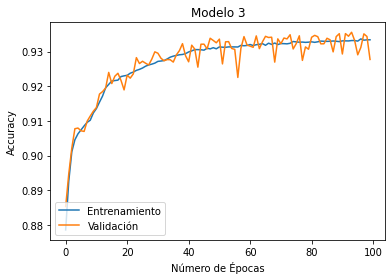

In [367]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo 3')
plt.ylabel('Accuracy')
plt.xlabel('Número de Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower left')
plt.show()

In [368]:
#Obtener la matriz de confusión
y_prediccion = (model3.predict(X_test) > 0.5).astype("int32")
y_pred = []
for k in range(0,len(y_prediccion)):
  y_pred.append(y_prediccion[k][0])
y_pred = np.array(y_pred)
y_pred = pd.DataFrame(y_pred,columns=["Prediccion"])
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred["Prediccion"].values)
print(cf_matrix)

Exactitud =              (cf_matrix[0,0]+cf_matrix[1,1]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Error_de_clasificacion = (cf_matrix[0,1]+cf_matrix[1,0]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Sensibilidad =           (cf_matrix[0,0]               ) / (cf_matrix[0,0]+cf_matrix[0,1]                              )
Especificidad=           (cf_matrix[1,1]               ) / (cf_matrix[1,1]+cf_matrix[0,1]                              )
print("Exactitud:", 100*Exactitud)
print("Error de clasificación:", 100*Error_de_clasificacion)
print("Sensibilidad:", 100*Sensibilidad)
print("Especificidad:", 100*Especificidad)

[[283143  11687]
 [ 14171  48792]]
Exactitud: 92.77291618337978
Error de clasificación: 7.227083816620225
Sensibilidad: 96.0360207577248
Especificidad: 80.67593710213463


In [369]:
# Definir el tamanio de la capa de entrada
n_features = X_train.values.shape[1]
# Definir el modelo a utilizar
model3 = Sequential()
model3.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model3.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model3.add(Dense(1, activation=activations.tanh))  
# Compilar el modelo
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
# Ajuste del modelo. Tambien se calcula el error en entrenamiento y prueba.
history = model3.fit(X_train.values, y_train, epochs=100, batch_size=100, verbose=1,validation_data=(X_test.values, y_test))

Epoch 1/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.3234 - accuracy: 0.8674 - val_loss: 0.2969 - val_accuracy: 0.8740
Epoch 2/100
5367/5367 [==============================] - 16s 3ms/step - loss: 0.3010 - accuracy: 0.8767 - val_loss: 0.2871 - val_accuracy: 0.8791
Epoch 3/100
5367/5367 [==============================] - 16s 3ms/step - loss: 0.2890 - accuracy: 0.8801 - val_loss: 0.2786 - val_accuracy: 0.8813
Epoch 4/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2791 - accuracy: 0.8839 - val_loss: 0.2675 - val_accuracy: 0.8876
Epoch 5/100
5367/5367 [==============================] - 17s 3ms/step - loss: 0.2631 - accuracy: 0.8932 - val_loss: 0.2570 - val_accuracy: 0.8962
Epoch 6/100
5367/5367 [==============================] - 16s 3ms/step - loss: 0.2523 - accuracy: 0.8995 - val_loss: 0.2424 - val_accuracy: 0.9013
Epoch 7/100
5367/5367 [==============================] - 16s 3ms/step - loss: 0.2475 - accuracy: 0.9019 - val_loss: 0.2431 -

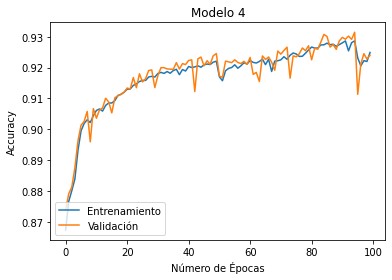

In [370]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo 4')
plt.ylabel('Accuracy')
plt.xlabel('Número de Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower left')
plt.show()

In [371]:
#Obtener la matriz de confusión
y_prediccion = (model3.predict(X_test) > 0.5).astype("int32")
y_pred = []
for k in range(0,len(y_prediccion)):
  y_pred.append(y_prediccion[k][0])
y_pred = np.array(y_pred)
y_pred = pd.DataFrame(y_pred,columns=["Prediccion"])
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred["Prediccion"].values)
print(cf_matrix)

Exactitud =              (cf_matrix[0,0]+cf_matrix[1,1]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Error_de_clasificacion = (cf_matrix[0,1]+cf_matrix[1,0]) / (cf_matrix[0,0]+cf_matrix[0,1]+cf_matrix[1,0]+cf_matrix[1,1])
Sensibilidad =           (cf_matrix[0,0]               ) / (cf_matrix[0,0]+cf_matrix[0,1]                              )
Especificidad=           (cf_matrix[1,1]               ) / (cf_matrix[1,1]+cf_matrix[0,1]                              )
print("Exactitud:", 100*Exactitud)
print("Error de clasificación:", 100*Error_de_clasificacion)
print("Sensibilidad:", 100*Sensibilidad)
print("Especificidad:", 100*Especificidad)

[[283271  11559]
 [ 15620  47343]]
Exactitud: 92.40370828942991
Error de clasificación: 7.596291710570078
Sensibilidad: 96.07943560695993
Especificidad: 80.37587857797698
